In [3]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from glob import glob

Prior code from mva:

In [5]:
def read_xy(path: str):
    df = pd.read_csv(path)
    df['N'] = df.index + 1
    df['r'] = (df.x ** 2 + df.y ** 2) ** 0.5
    df['cr'] = df.r.cummax()
    df['fd'] = np.log(df.N) / np.log(df.cr)

    return df


def read_all(load_dir: str):
    paths = glob(f'{load_dir}/*.csv')
    return [read_xy(path) for path in paths]

In [7]:
def stick_prob_from_load_dir(load_dir: str):
    return float(Path(load_dir).name)

In [10]:
def read_sp_dir(load_dir: str):
    return stick_prob_from_load_dir(load_dir), read_all(load_dir)

In [48]:
p, dfs = read_sp_dir('/Users/joshuacoles/Developer/checkouts/jc3091/CompB DLA/data-analysis/data/stick-probability/0.6')

/Users/joshuacoles/Library/Caches/pypoetry/virtualenvs/data-analysis-B4Au_hWl-py3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/joshuacoles/Library/Caches/pypoetry/virtualenvs/data-analysis-B4Au_hWl-py3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/joshuacoles/Library/Caches/pypoetry/virtualenvs/data-analysis-B4Au_hWl-py3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/joshuacoles/Library/Caches/pypoetry/virtualenvs/data-analysis-B4Au_hWl-py3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/joshu

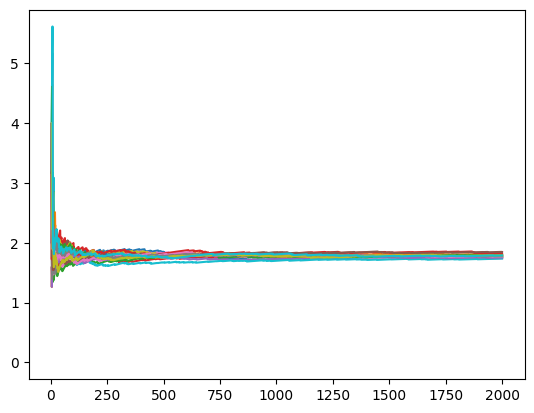

In [16]:
for df in dfs:
    plt.plot(df.N, df.fd)

plt.show()

In [19]:
def convergent_tail_index(series, tol):
    diffs = np.abs(np.ediff1d(series))
    for i in range(0, len(diffs)):
        if np.max(diffs[i:]) <= tol:
            return i

    # No convergence found
    return None


def mean_of_tail(series, tol=0.05):
    tail_index = convergent_tail_index(series, tol)
    return np.mean(series[tail_index:])

In [59]:
def fd_of_dfs(dfs):
    fds = [mean_of_tail(df.fd, 0.001) for df in dfs]
    fds_clean = [f for f in fds if f < np.inf]
    return np.mean(fds_clean), np.std(fds_clean)

In [71]:
a = [read_sp_dir(load_dir) for load_dir in glob('/Users/joshuacoles/Developer/checkouts/jc3091/CompB DLA/data-analysis/data/stick-probability/*')]

/Users/joshuacoles/Library/Caches/pypoetry/virtualenvs/data-analysis-B4Au_hWl-py3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/joshuacoles/Library/Caches/pypoetry/virtualenvs/data-analysis-B4Au_hWl-py3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/joshuacoles/Library/Caches/pypoetry/virtualenvs/data-analysis-B4Au_hWl-py3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/joshuacoles/Library/Caches/pypoetry/virtualenvs/data-analysis-B4Au_hWl-py3.10/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/joshu

In [72]:
b = [fd_of_dfs(dfs) for (p, dfs) in a]
ps = [p for (p, dfs) in a]
means, stds = list(zip(*b))

/Users/joshuacoles/Library/Caches/pypoetry/virtualenvs/data-analysis-B4Au_hWl-py3.10/lib/python3.10/site-packages/numpy/lib/arraysetops.py:89: RuntimeWarning: invalid value encountered in subtract
  return ary[1:] - ary[:-1]


<ErrorbarContainer object of 3 artists>

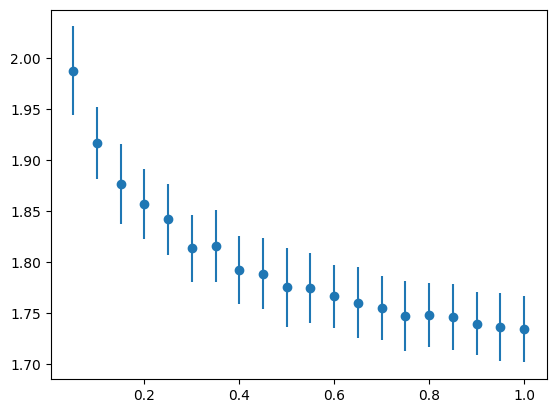

In [73]:
plt.errorbar(ps, means, stds, fmt="o")